In [56]:
import os
import mne
import pandas as pd
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

In [57]:
path = os.path.join('/', 'well', 'woolrich', 'projects', 'cichy118_cont',
                    'preproc_data_onepass', 'lowpass25hz', 'subj0',
                    'train_data_pca306', 'cch0.mat')
trial = loadmat(path)

In [60]:
trial['x_train_t'].shape

(2478, 1, 101)

In [4]:
trial = np.load('things_data/trial0.npy')
trial.shape

(1321, 300)

In [49]:
raw_dir = "/well/woolrich/projects/THINGS-MEG/raw_data/sub-BIGMEG1"
path = op.join(raw_dir, 'ses-01', 'meg', 'sub-BIGMEG1_ses-01_task-main_run-01_meg.ds')
raw = mne.io.read_raw_ctf(path, preload=True)

ds directory : /well/woolrich/projects/THINGS-MEG/raw_data/sub-BIGMEG1/ses-01/meg/sub-BIGMEG1_ses-01_task-main_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -0.92   77.00    0.00 mm <->   -0.92   77.00   -0.00 mm (orig :  -40.06   68.57 -237.90 mm) diff =    0.000 mm
       0.92  -77.00    0.00 mm <->    0.92  -77.00    0.00 mm (orig :   70.03  -39.14 -237.69 mm) diff =    0.000 mm
      79.58    0.00    0.00 mm <->   79.58   -0.00    0.00 mm (orig :   71.23   70.87 -233.83 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /well/woolrich/projects/THINGS-MEG/raw_data/sub-BIGMEG1/ses-01/meg/sub-BIGMEG1_ses-01_task-main_run-01_meg.ds/sub-BIGMEG1_ses-01_task-main_run-01_meg.meg4: 
    System clock channel is available, checking

In [56]:
len(raw)/1200

348.0

In [40]:
raw.info
raw.pick('misc').ch_names

['UADC016-2104']

In [4]:
misc = raw.pick('misc').get_data()

In [45]:
opt_channel = misc[8] > 0.1

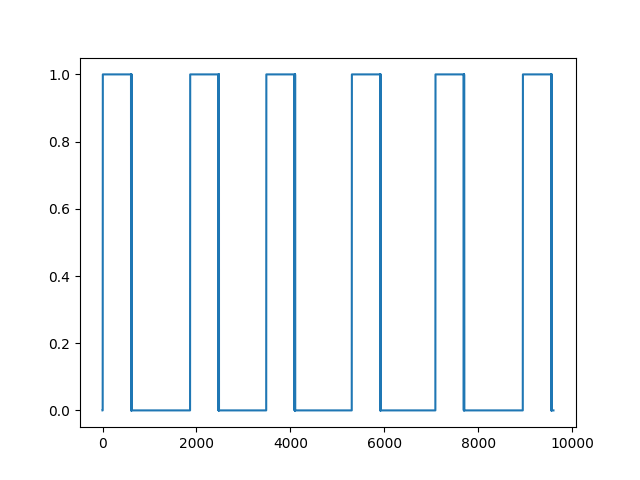

In [46]:
%matplotlib widget
plt.plot(opt_channel[5400:15000])

In [15]:
trig_events = mne.find_events(raw, stim_channel= 'UPPT001' ,initial_event=False)

Trigger channel has a non-zero initial value of 128 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
227 events found
Event IDs: [32 64]


In [53]:
lis = [np.array([0, 1]), np.array([1, 2]), np.array([2, 3])]

for a in lis:
    a[0] = 5

lis

[array([5, 1]), array([5, 2]), array([5, 3])]

In [50]:
# apply lambda x: x > 0.1 to 'UADC016-2104' channel with mne
fun = lambda x: x > 1
raw.apply_function(fun, verbose=True, picks=['UADC016-2104'])


<RawCTF | sub-BIGMEG1_ses-01_task-main_run-01_meg.meg4, 310 x 417600 (348.0 s), ~988.2 MB, data loaded>

In [51]:
opt_events = mne.find_events(raw, stim_channel= 'UADC016-2104' ,initial_event=False,
                             min_duration=0.1)

227 events found
Event IDs: [1]


In [52]:
opt_events

array([[  3424,      0,      1],
       [  5405,      0,      1],
       [  7266,      0,      1],
       [  8886,      0,      1],
       [ 10707,      0,      1],
       [ 12488,      0,      1],
       [ 14348,      0,      1],
       [ 16209,      0,      1],
       [ 17770,      0,      1],
       [ 19571,      0,      1],
       [ 21431,      0,      1],
       [ 23172,      0,      1],
       [ 24793,      0,      1],
       [ 26633,      0,      1],
       [ 28514,      0,      1],
       [ 30135,      0,      1],
       [ 31995,      0,      1],
       [ 33676,      0,      1],
       [ 35457,      0,      1],
       [ 37338,      0,      1],
       [ 39058,      0,      1],
       [ 40939,      0,      1],
       [ 42720,      0,      1],
       [ 44600,      0,      1],
       [ 46261,      0,      1],
       [ 48142,      0,      1],
       [ 49742,      0,      1],
       [ 51483,      0,      1],
       [ 53344,      0,      1],
       [ 55205,      0,      1],
       [ 5

In [18]:
trig_events

array([[  3421,      0,     64],
       [  5403,      0,     64],
       [  7262,      0,     64],
       [  8883,      0,     64],
       [ 10704,      0,     64],
       [ 12484,      0,     64],
       [ 14345,      0,     64],
       [ 16205,      0,     64],
       [ 17766,      0,     64],
       [ 19567,      0,     64],
       [ 21428,      0,     64],
       [ 23168,      0,     64],
       [ 24789,      0,     64],
       [ 26629,      0,     64],
       [ 28510,      0,     64],
       [ 30131,      0,     64],
       [ 31992,      0,     64],
       [ 33672,      0,     64],
       [ 35453,      0,     64],
       [ 37334,      0,     64],
       [ 39054,      0,     64],
       [ 40935,      0,     64],
       [ 42716,      0,     64],
       [ 44597,      0,     64],
       [ 46257,      0,     64],
       [ 48138,      0,     64],
       [ 49738,      0,     64],
       [ 51479,      0,     64],
       [ 53340,      0,     64],
       [ 55201,      0,     64],
       [ 5

In [44]:
misc = misc[:, ::6]

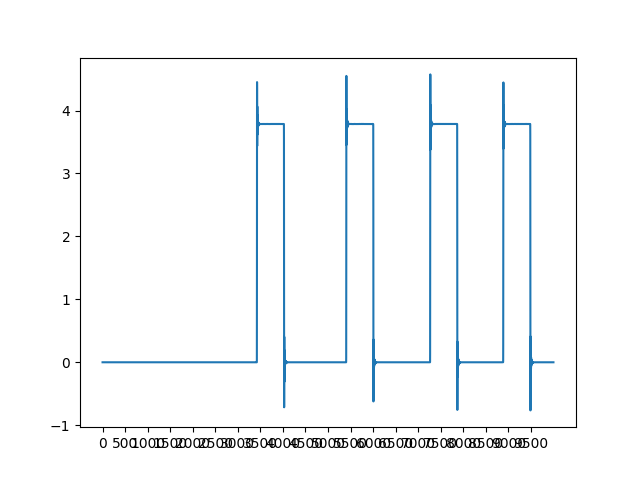

In [91]:
%matplotlib widget
plt.plot(misc[8][:10000])
plt.xticks(np.arange(0, 10000, 500))
x = 0
#plt.plot(misc[8][3590:4500])

In [57]:
path = op.join(raw_dir, 'ses-01', 'meg', 'sub-BIGMEG1_ses-01_task-main_run-01_events.tsv')
events = pd.read_csv(path, sep='\t')

In [71]:
events_mne = []
for i in range(len(events)):
    if events['trial_type'][i] == 'exp':
        onset = int(events['onset'][i] * 1200)
        idd = events['category_nr'][i]
        events_mne.append(np.array([onset, 0, idd]))
                          
events_mne = np.array(events_mne)

In [82]:
events['onset'] * 1200

0        3600.0
1        5580.0
2        7200.0
3        9000.0
4       10800.0
         ...   
221    401100.0
222    403080.0
223    404940.0
224    406920.0
225    408900.0
Name: onset, Length: 226, dtype: float64

In [70]:
events_mne.shape

(185, 3)

In [72]:
epochs = mne.Epochs(raw, events_mne)

Not setting metadata
185 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [73]:
epochs

Number of events,185
Events,1005: 11011: 11025: 11036: 11046: 11060: 11098: 11101: 11105: 11114: 11117: 11120: 11136: 11140: 11158: 1116: 11170: 11177: 11195: 11197: 11210: 11221: 11226: 11251: 11281: 11290: 11291: 11297: 11300: 11328: 1134: 11345: 11351: 11352: 11360: 1137: 11370: 11378: 11404: 11405: 11406: 11417: 11430: 11436: 11439: 11454: 11459: 1146: 11468: 1148: 11483: 11485: 11493: 1150: 11543: 11561: 11562: 11566: 11570: 11591: 11601: 11611: 11613: 11624: 11636: 11647: 11660: 11662: 11665: 11666: 11694: 11696: 11715: 11723: 11734: 11736: 11745: 11748: 11762: 11777: 11780: 11787: 11789: 11802: 11821: 11835: 11840: 11853: 1216: 1217: 122: 1220: 1225: 1269: 1274: 1277: 1307: 1325: 1356: 1358: 1362: 1365: 1368: 1373: 1379: 138: 1386: 1387: 1391: 1393: 1406: 1412: 1415: 1416: 1424: 1429: 143: 1431: 1433: 1440: 1443: 1446: 1453: 1456: 1460: 1465: 1473: 1480: 1484: 1487: 1497: 1501: 1515: 1540: 1566: 1576: 158: 1593: 1600: 1606: 1608: 1621: 1631: 1648: 1663: 167: 1679: 1689: 1692: 1693: 1698: 1726: 1732: 1736: 1737: 174: 1744: 175: 1755: 1756: 1757: 1779: 1786: 1828: 1830: 1836: 1846: 1849: 1850: 1855: 1875: 1877: 1892: 1894: 1895: 1896: 1902: 1907: 1909: 1911: 1934: 1956: 1960: 1966: 1994: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec
